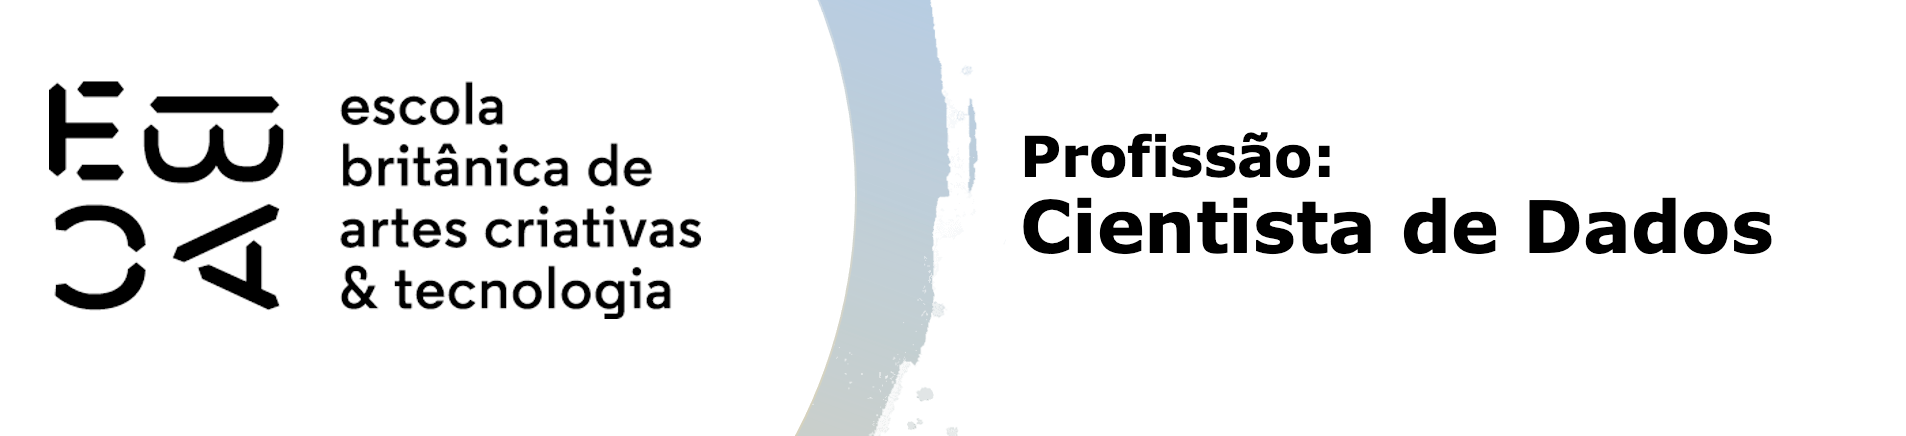

# Regressão III - Tarefa

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

In [4]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [5]:
df.columns

Index(['index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')

## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [7]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [8]:
df.fillna(df[['tempo_emprego']].mean(), inplace=True)

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [10]:
# Resetando o índice para transformar `data_ref` em coluna
df.reset_index(inplace=True)

#Convertendo a coluna de data to datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

#Ordenaçao dos dados pela data 
df = df.sort_values(by='data_ref')
df['data_ref'].head()

0       2015-01-01
33328   2015-01-01
33329   2015-01-01
33330   2015-01-01
33331   2015-01-01
Name: data_ref, dtype: datetime64[ns]

In [11]:
df['data_ref'].value_counts()

data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

In [12]:
#Base teste
df_test = df[df['data_ref'] >= '2016-01-01'] #Ultimos 3 meses

#Base treino
df_train = df[df['data_ref'] < '2016-01-01']

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [14]:
y_train = df_train['renda']
y_test = df_test['renda']

X_train = df_train.drop(columns=['renda', 'index', 'data_ref'])
X_test = df_test.drop(columns=['renda', 'index', 'data_ref'])

#Transformando as variaveis categoricas em numericas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Convertendo colunas booleanas para inteiros (0 e 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Adicionando a constante (intercepto) ao modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

#Modelo de Regressao Linear
modelo = sm.OLS(y_train, X_train_const).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     8081.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        04:43:43   Log-Likelihood:            -7.6747e+06
No. Observations:              600000   AIC:                         1.535e+07
Df Residuals:                  599975   BIC:                         1.535e+07
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -3.896e+04   4529.540     -8.602      0.000   -4.78e+04   -3.01e+04
qtd_filhos                     -998.1454   2135.478     -0.467      0.640   -5183.613    3187.323
idade                           344.1566     14.695     23.420      0.000     315.354     372.959
tempo_emprego                  7796.8876     19.742    394.942      0.000    7758.194    7835.581
qt_pessoas_residencia            12.2258   2130.947      0.006      0.995   -4164.363    4188.814
sexo_M                        -3028.2959    265.018    -11.427      0.000   -3547.722   -2508.870
posse_de_veiculo_S            -1073.1251    252.016     -4.258      0.000   -1567.068    -579.182
posse_de_imovel_S              6563.7370    246.510     26.627      0.000    6080.585    7046.889
tipo_renda_Bolsista           -3.859e+04   4984.702     -7.743      0.000   -4.84e+04   -2.88e+04
tipo_renda_Empresário          2740.4204    284.444      9.634      0.000    2182.920    3297.921
tipo_renda_Pensionista        -2.336e+04    406.481    -57.465      0.000   -2.42e+04   -2.26e+04
tipo_renda_Servidor público    -457.3393    418.553     -1.093      0.275   -1277.689     363.011
educacao_Médio                -3832.5634   1064.274     -3.601      0.000   -5918.506   -1746.621
educacao_Pós graduação         8289.0857   3623.714      2.287      0.022    1186.722    1.54e+04
educacao_Superior completo      -91.4747   1075.656     -0.085      0.932   -2199.727    2016.777
educacao_Superior incompleto   4855.8935   1203.426      4.035      0.000    2497.217    7214.570
estado_civil_Separado          1294.8838   2186.321      0.592      0.554   -2990.236    5580.003
estado_civil_Solteiro          1.029e+04   2145.139      4.797      0.000    6085.679    1.45e+04
estado_civil_União             1458.6836    428.517      3.404      0.001     618.804    2298.563
estado_civil_Viúvo            -1120.3976   2209.889     -0.507      0.612   -5451.710    3210.915
tipo_residencia_Casa          -2767.1553    968.058     -2.858      0.004   -4664.518    -869.793
tipo_residencia_Com os pais    1649.8656   1096.860      1.504      0.133    -499.946    3799.677
tipo_residencia_Comunitário    2197.8541   1952.800      1.125      0.260   -1629.571    6025.279
tipo_residencia_Estúdio       -6503.3085   1631.468     -3.986      0.000   -9700.933   -3305.684
tipo_residencia_Governamental -6792.5510   1152.138     -5.896      0.000   -9050.705   -4534.397
==============================================================================
Omnibus:                  1429410.201   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      29372977435.212
Skew:                          24.169   Prob(JB):                         0.00
Kurtosis:              

In [15]:
print(f"O R² ajustado do modelo é: {modelo.rsquared_adj:.4f}")

O R² ajustado do modelo é: 0.2443


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [17]:
df['tempo_emprego_cat'], quebras = pd.qcut(df.tempo_emprego, 20, duplicates='drop', retbins=True)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(15.216, 20.216]"
33328,2015-01-01,13463,F,S,N,0,Assalariado,Superior completo,União,Casa,26,2.347945,2.0,1684.88,"(2.099, 2.912]"
33329,2015-01-01,5595,F,N,N,0,Assalariado,Médio,Casado,Casa,40,2.871233,2.0,2480.96,"(2.099, 2.912]"
33330,2015-01-01,4363,F,S,N,0,Servidor público,Superior completo,Solteiro,Casa,33,10.430137,1.0,2709.54,"(9.093, 10.438]"
33331,2015-01-01,14525,F,N,S,0,Servidor público,Superior completo,Casado,Casa,25,6.301370,2.0,12333.16,"(5.759, 6.622]"


In [18]:
perfil_emprego = df.groupby('tempo_emprego_cat', observed=False).agg(
    qte_obs = ('tempo_emprego', 'count'),
    media_log_renda = ('renda', lambda x:np.log(x).mean()),
    media_tempo_emprego = ('tempo_emprego', 'mean')
).reset_index()
perfil_emprego.head()

,tempo_emprego_cat,qte_obs,media_log_renda,media_tempo_emprego
0,"(0.11699999999999999, 0.816]",37699,8.134693,0.515096
1,"(0.816, 1.458]",37522,8.215925,1.124770
2,"(1.458, 2.099]",37437,8.335011,1.783247
3,"(2.099, 2.912]",37391,8.390223,2.513020
4,"(2.912, 3.636]",37915,8.522387,3.300942


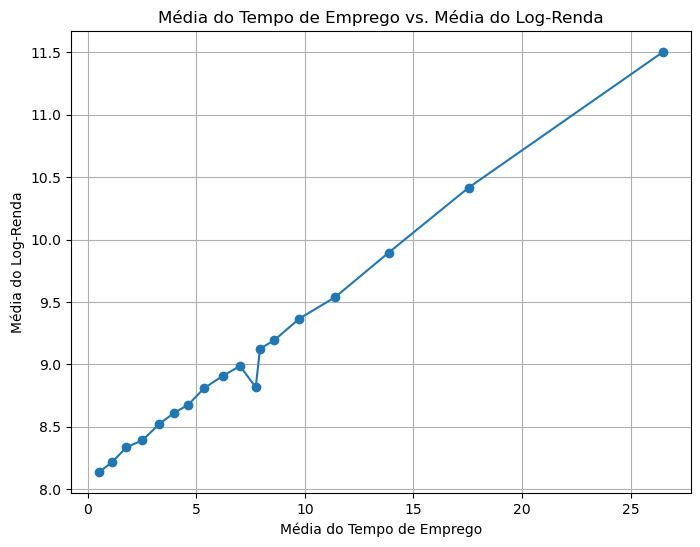

In [19]:
# Criar o gráfico da média do tempo de emprego pela média do log-renda
plt.figure(figsize=(8, 6))
plt.plot(perfil_emprego['media_tempo_emprego'], perfil_emprego['media_log_renda'], marker='o', linestyle='-')
plt.xlabel('Média do Tempo de Emprego')
plt.ylabel('Média do Log-Renda')
plt.title('Média do Tempo de Emprego vs. Média do Log-Renda')
plt.grid(True)
plt.show()

Pelo gráfico acima eu recomendaria utilizar o metodo de Regressão Segmentada, pois há uma ponto de  mudança brusca na inclinação, portanto definir pontos de corte pode ajudar.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [25]:
#Regressao linear simples
y = df['renda']
X_reg_linear = sm.add_constant(df[['tempo_emprego']]) 
modelo_linear = sm.OLS(y, X_reg_linear).fit()
df['renda_pred_linear'] = modelo_linear.predict(X_reg_linear)

#Regressao segmentada
ponto_quebra = df['tempo_emprego'].median()
df['tempo_emprego_segmentado'] = np.where(df['tempo_emprego'] > ponto_quebra, df['tempo_emprego'] - ponto_quebra, 0)

# Variáveis para a regressão segmentada
X_reg_segmentada = sm.add_constant(df[['tempo_emprego', 'tempo_emprego_segmentado']])
modelo_segmentado = sm.OLS(y, X_reg_segmentada).fit()
df['renda_pred_segmentada'] = modelo_segmentado.predict(X_reg_segmentada)

#Lowess
lowess_fit = lowess(df['renda'], df['tempo_emprego'], frac=0.2)

#Previsoes 
comparacao_modelos = pd.DataFrame({
    "Modelo": ["Regressão Linear Simples", "Regressão Segmentada", "LOWESS (Visualização)"],
    "R² Ajustado": [modelo_linear.rsquared_adj, modelo_segmentado.rsquared_adj, "N/A"]
})

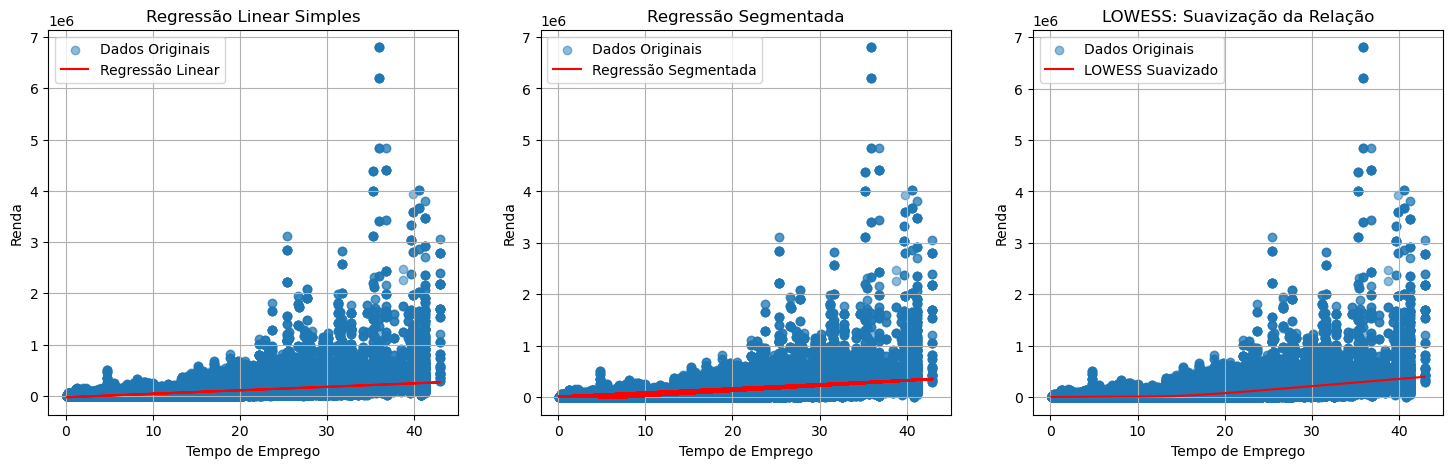

In [28]:
# Gráficos
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico do Primeiro Modelo (Linear Simples)
ax[0].scatter(df['tempo_emprego'], df['renda'], alpha=0.5, label="Dados Originais")
ax[0].plot(df['tempo_emprego'], df['renda_pred_linear'], color='red', label="Regressão Linear")
ax[0].set_title("Regressão Linear Simples")
ax[0].set_xlabel("Tempo de Emprego")
ax[0].set_ylabel("Renda")
ax[0].legend()
ax[0].grid(True)

# Gráfico da Regressão Segmentada
ax[1].scatter(df['tempo_emprego'], df['renda'], alpha=0.5, label="Dados Originais")
ax[1].plot(df['tempo_emprego'], df['renda_pred_segmentada'], color='red', label="Regressão Segmentada")
ax[1].set_title("Regressão Segmentada")
ax[1].set_xlabel("Tempo de Emprego")
ax[1].set_ylabel("Renda")
ax[1].legend()
ax[1].grid(True)

# Gráfico do LOWESS

ax[2].scatter(df['tempo_emprego'], df['renda'], alpha=0.5, label="Dados Originais")
ax[2].plot(lowess_fit[:, 0], lowess_fit[:, 1], color='red', label="LOWESS Suavizado")
ax[2].set_title("LOWESS: Suavização da Relação")
ax[2].set_xlabel("Tempo de Emprego")
ax[2].set_ylabel("Renda")
ax[2].legend()
ax[2].grid(True)

plt.show()

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [31]:
comparacao_modelos

,Modelo,R² Ajustado
0,Regressão Linear Simples,0.210514
1,Regressão Segmentada,0.263931
2,LOWESS (Visualização),N/A


- A Regresão Segmentada melhorou o ajuste do modelo, passando de 0.2105 para 0.2639. Isso significa que o modelo segmentado conseguiu explicar 5,34% a mais da variabilidade da renda do que a regressão linear simples.

- O LOWESS nao mostrou mudancas significativas no gráfico. 